## PART 03. Numpy 모듈
- https://numpy.org/doc/stable/reference/index.html
- Numpy basics : https://numpy.org/devdocs/user/basics.html

##1.ndarray 성능확인


In [2]:
import numpy as np

In [3]:
# Python에서 두 list의 합을 구하는 방법
A = [1, 2, 3]
B = [4, 5, 6]
C = []
for a, b in zip(A, B):
  C.append(a + b)

print(C)

[5, 7, 9]


In [4]:
# numpy를 사용하여 두 배열의 합을 구하는 방법
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
C = A + B
print(C, type(C))

[5 7 9] <class 'numpy.ndarray'>


In [5]:
a = [ [ 1, 2, 3, 4 ] for _ in range(1000000)]  # a 1000000 행, 4 열 - list
b = np.array(a) # ndarray

# python list에서의 열 변경
def exchange_list(a):
  c = []
  for x in a:
      x[2], x[3], x[0], x[1] = x
      c.append(x)
  return c

# Numpy를 사용하여 열 변경
def exchange_ndarray(a):
   return a[ : ,[2, 3, 0, 1]]

In [6]:
print(a[:2], b[:2], sep='\n')

[[1, 2, 3, 4], [1, 2, 3, 4]]
[[1 2 3 4]
 [1 2 3 4]]


In [7]:
c = exchange_list(a)
d = exchange_ndarray(b)
print(c[:2], d[:2], sep='\n')  

[[3, 4, 1, 2], [3, 4, 1, 2]]
[[3 4 1 2]
 [3 4 1 2]]


In [8]:
%timeit exchange_list(a)

193 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit exchange_ndarray(b) 

14.7 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2.ndarray 속성
- ndarray : https://numpy.org/doc/stable/reference/arrays.ndarray.html

### 2-01. ndarray 속성
- a.ndim : 차원, 배열의 깊이
- a.shape : 생성된 배열의 구조에 대한 정보, tuple 형태, 각 차원(축)별 요소 개수 정보
- a.size : 배열의 element 개수
- a.dtype : 배열의 데이터 타입(자료형)에 대한 정보
   > https://numpy.org/devdocs/user/basics.types.html
- a.itemsize : element의 메모리 사용 byte 수
- a.strides : 메모리에서 데이터의 간격에 대한 정보, shape, dtype과 관련 있음, tuple 형태, 각 차원별 데이터 간격 정보

In [ ]:
import numpy as np

In [ ]:
#print array information
def printInfo(a):
    data = ['a.ndim', 'a.shape', 'a.size', 'a.dtype', 'a.itemsize', 'a.strides']
    for x in data:
        print('%-11s' % x, eval(x))
    print('-' * 20)

a = np.array([[0,1,2],[3,4,5]]) #, dtype=np.int32)
print(a)
print('-' * 20)
printInfo(a)

print(a.ndim, a.shape, a.size, a.dtype, a.itemsize, a.strides)

[[0 1 2]
 [3 4 5]]
--------------------
a.ndim      2
a.shape     (2, 3)
a.size      6
a.dtype     int64
a.itemsize  8
a.strides   (24, 8)
--------------------
2 (2, 3) 6 int64 8 (24, 8)


### 2-02. axis 개념
- shape 표기법에 따라 앞에 표기되는 축이 0번 그 뒤로 1씩 증가한 번호
- 축 번호를 음수로 사용할 수 있으며, 뒤에서부터 -1, 그 앞으로 1씩 감소한 번호 사용
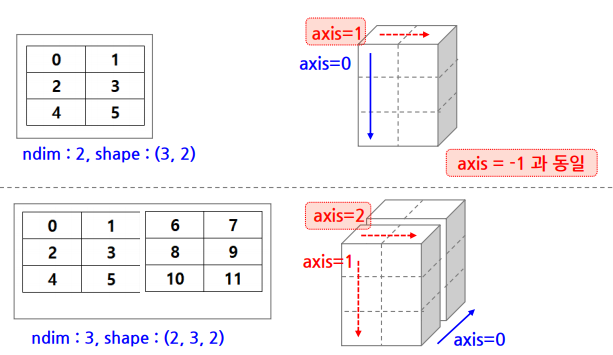

## 3.ndarray 생성

In [11]:
import numpy as np

In [12]:
def printary(*a):
    for x in a:
        print(f'{type(x)}\n{x.dtype}\n{x}', end='\n\n')
            
    print("-" * 30)

### 1-01. np.array 사용

In [13]:
#np.array(object : array_like, dtype=None)
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])
c = np.array([[1, 2, 3], [4, 5]])  # array_like가 아님
printary(a, b, c)

<class 'numpy.ndarray'>
int64
[1 2 3]

<class 'numpy.ndarray'>
int64
[[1 2 3]
 [4 5 6]]

<class 'numpy.ndarray'>
object
[list([1, 2, 3]) list([4, 5])]

------------------------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
# Structured Array
sdtype = [('name', '<U10'), ('height', '<i4'), ('weight', np.float32)]
value =  [('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam',  175, 82.8)]
    
a = np.array(value, dtype=sdtype)
printary(a)
a

<class 'numpy.ndarray'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
[('Tom', 178, 98.5) ('Jim', 183, 79.5) ('Adam', 175, 82.8)]

------------------------------


array([('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam', 175, 82.8)],
      dtype=[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')])

In [ ]:
printary(a['name'], a['height'], a['weight'])
printary(a[0], a[1], a[2])
print(a.shape, a.strides, a[0])   # a.strides - 1개 row에 해당하는 메모리 크기

### 1-02. np.arange 사용

In [ ]:
# np.arange(stop:number, dtype=None), np.arange(start, stop), np.arange(start, stop, step)
# 아래와 같은 결과가 출력되도록 arange의 argument를 채워보세요
a = np.arange( )
b = np.arange( )
c = np.arange( )
printary(a, b, c)

<class 'numpy.ndarray'>
int64
[0 1 2 3 4]

<class 'numpy.ndarray'>
int64
[1 3 5 7 9]

<class 'numpy.ndarray'>
float64
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]

------------------------------


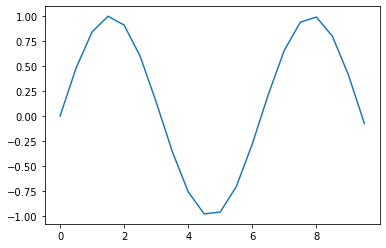

In [ ]:
#그래프 그릴때 축설정으로 사용 예
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.5)
y = np.sin(x)
plt.plot(x, y)   
plt.show()

In [ ]:
# 1개 값도 array_like 이다
x = np.array(1)    #  스칼라
print(x, type(x))

1 <class 'numpy.ndarray'>


### 1-03. np.linspace 사용

In [ ]:
# np.linspace(start:array_like, stop, num=50, endpoint=True, retstep=False, dtype=None)

# 1에서 5까지, 9개 숫자
a = np.linspace( )

# 1에서 5보다 작은수까지 10개 (endpoint=False 사용)
b = np.linspace( )

# 1에서 5까지 9개 숫자, step도 반환 (retstep=True 사용)
c = np.linspace( )

#print(a, b, c, sep="\n")

for arr in a, b, c[0]:
    print(' '.join( f'{x:6.2f}' for x in arr ))

  1.00   1.50   2.00   2.50   3.00   3.50   4.00   4.50   5.00
  1.00   1.40   1.80   2.20   2.60   3.00   3.40   3.80   4.20   4.60
  1.00   1.50   2.00   2.50   3.00   3.50   4.00   4.50   5.00


In [ ]:
# start, stop을 list로 사용할 수 있음
x = np.linspace([1, 2, 3], [2, 4, 6], num=5)
print(x)

[[1.   2.   3.  ]
 [1.25 2.5  3.75]
 [1.5  3.   4.5 ]
 [1.75 3.5  5.25]
 [2.   4.   6.  ]]


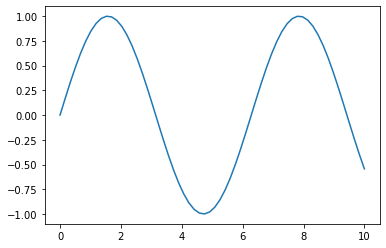

In [ ]:
# 그래프 그리기에 linspace 활용
x = np.linspace(0, 10, 60)
y = np.sin(x)
plt.plot(x, y)
plt.show()

### 1-04. random 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(threshold=999,
                    suppress=True,
                    precision=4,
                    edgeitems=3)

In [ ]:
def printary(*a):
    for x in a :
        print(f"shape : {x.shape}")
        print(f"array : %s{x} " % ('' if x.ndim == 1 else '\n'))
        print("mean  : %.3f, std : %.3f" % (x.mean(), x.std()))
        print("-" * 30)

In [ ]:
def showHist(x):
  plt.hist(x)
  plt.show()

In [ ]:
# np.random.randint(e, size=n)
# np.random.randint(s, e, size=n)
# 0~e-1, s~e-1 범위의 값을 갖는 균일 분포의 정수 난수 생성
# size : 정수(1차원), tuple(1차원 이상)로 shape 지정

# (5,) shape으로 0~9 범위를 갖는 균일 분포의 정수 난수 생성
a = np.random.randint(5, size=(5,))

# (2,4) shape으로 50~99 범위를 갖는 균일 분포의 정수 난수 생성
b = np.random.randint(50, 100, (2,4)) 
printary(a, b)

shape : (5,)
array : [0.5488 0.7152 0.6028 0.5449 0.4237] 
mean  : 0.567, std : 0.094
------------------------------
shape : (2, 2, 3)
array : 
[[[0.6459 0.4376 0.8918]
  [0.9637 0.3834 0.7917]]

 [[0.5289 0.568  0.9256]
  [0.071  0.0871 0.0202]]] 
mean  : 0.526, std : 0.323
------------------------------


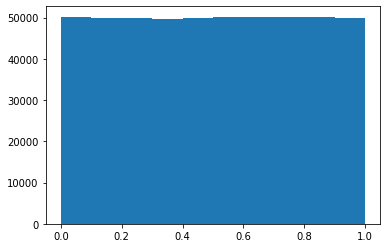

In [ ]:
showHist(np.random.rand(500000))

In [ ]:
# np.random.randint(e, size=n)
# np.random.randint(s, e, size=n)
# 0~e-1, s~e-1 범위의 값을 갖는 균일 분포의 정수 난수 생성
# size : 정수(1차원), tuple(1차원 이상)로 shape 지정

# (5,) shape으로 0~9 범위를 갖는 균일 분포의 정수 난수 생성
a = 

# (2,4) shape으로 50~99 범위를 갖는 균일 분포의 정수 난수 생성
b = 
printary(a, b)

shape : (5,)
array : [0 8 3 3 8] 
mean  : 4.400, std : 3.137
------------------------------
shape : (2, 4)
array : 
[[79 64 52 57]
 [79 53 85 90]] 
mean  : 69.875, std : 14.164
------------------------------


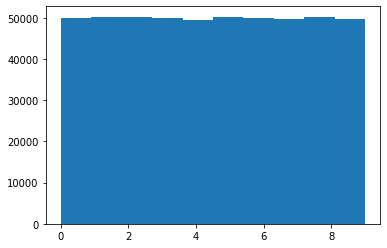

In [ ]:
showHist(np.random.randint(10, size=500000))

In [ ]:
# np.random.randn(d0, d1, ... dn)
# 평균 0, 표준편차 1을 갖는 가우시안 표준 정규 분포로 난수 배열 생성(음수 포함)

# (5,) shape을 갖는 평균 0, 표준편차 1을 갖는 가우시안 표준 정규 분포 난수 배열 생성
a = 

# (200, 50) shape을 갖는 평균 0, 표준편차 1을 갖는 가우시안 표준 정규 분포 난수 배열 생성
b = 
printary(a, b)

shape : (5,)
array : [ 0.5186  0.8347  0.2313 -0.3582 -0.2234] 
mean  : 0.201, std : 0.446
------------------------------
shape : (200, 50)
array : 
[[ 0.0594  0.0172 -0.5536 ...  0.4019 -1.4134  2.141 ]
 [ 0.7986  1.1502 -1.7717 ... -2.1855  0.5192 -1.9197]
 [-0.4164  0.0653  0.0266 ... -1.0678 -0.8063  0.1602]
 ...
 [ 0.6942  0.1601  0.4242 ... -0.2508  1.4569  1.3178]
 [ 0.0489 -1.6666 -1.6475 ... -0.5733  0.1646 -0.0153]
 [ 2.0257 -1.5143 -1.1048 ... -0.3525 -0.3502  0.2941]] 
mean  : -0.023, std : 0.996
------------------------------


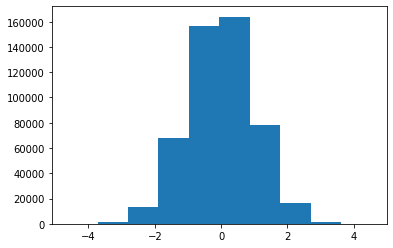

In [ ]:
showHist(np.random.randn(500000))

In [ ]:
# np.random.normal(평균, 표준편차, size)
# 생략하면 평균=0, 표준편차=1, size=1이 됨

# 평균 2, 표준편차 3, size는 (100, 20)인 배열 생성 
a = 
printary(a)

shape : (100, 20)
array : 
[[ 2.4375  5.7631  8.8411 ...  6.1862  8.2629  2.2378]
 [ 4.2665  7.4651  4.7042 ...  3.1145 -4.5185  5.4591]
 [ 5.9646  4.4424  8.26   ... -0.7143  1.8544  7.2505]
 ...
 [ 4.0245  0.3288  2.9779 ... -0.6544  3.2303  3.4702]
 [ 2.7203 -3.1442  1.6762 ...  1.9211  3.3268  5.3657]
 [-3.6286  2.5346  0.6768 ...  7.077   3.1236  4.0424]] 
mean  : 2.021, std : 3.046
------------------------------


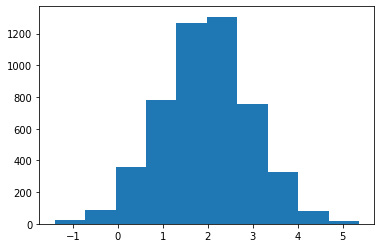

In [ ]:
showHist(np.random.normal(2, 1, (5000,)))

In [ ]:
#np.random.permutation(e) : 0 ~ e-1 값을 갖는 정수의 무작위 순서 1차원 배열 생성
#np.random.permutation(c) : c 요소들에 대해 무작위 순서로 변경된 1차원 배열 생성
# e : 정수, c : array_like 객체

# 0~9까지의 정수로 구성된 무작위 순서 1차원 배열 생성
a = 

# data를 무작위 순서로 변경한 배열 생성
data = np.array([1,3,4,5,3,1,3])
b = 

# mylist를 무작위 순서로 변경한 배열 생성
mylist = [[1,2,3],[4,5,6],[7,8,9],[3,2,1]]
c = 
printary(a, b, c)

shape : (10,)
array : [6 0 4 2 1 3 8 7 9 5] 
mean  : 4.500, std : 2.872
------------------------------
shape : (7,)
array : [1 3 4 3 3 1 5] 
mean  : 2.857, std : 1.355
------------------------------
shape : (4, 3)
array : 
[[7 8 9]
 [1 2 3]
 [3 2 1]
 [4 5 6]] 
mean  : 4.250, std : 2.618
------------------------------


### 1-05. 특정값으로 채워진 ndarray생성

In [ ]:
import numpy as np

In [ ]:
def printary(*a):
    for x in a:
        print(f'{x.dtype}\n{x}')
    print("-" * 30)

In [ ]:
#np.zeros(shape, dtype=float64)
#shape: 정수(1차원), tuple(1차원 이상)
mshape = (2, 3)

# 0으로 채워진 (10,) shape의 배열, dtype = np.int32
a = 

# 0으로 채워진 mshape => (2, 3) shape 크기의 배열
b = 
printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [ ]:
#np.empty(shape, dtype=float64)

# 별도 채우기가 되지 않은 10 크기의 배열, dtype = np.int32
a = 

# 별도 채우기가 되지 않은 mshape 크기의 배열
b = 
printary(a, b)

shape : (10,)
array : [5 0 6 0 7 0 8 0 9 0] 
mean  : 3.500, std : 3.640
------------------------------
shape : (2, 3)
array : 
[[17.2 17.2 17.2]
 [17.2 17.2 24.2]] 
mean  : 18.367, std : 2.609
------------------------------


In [ ]:
#np.ones(shape,dtype=float64)
#np.full(shape, value, dtype=None)

# 1로 채우기 된 mshape 크기의 배열
a = 

# 5로 채우기 된 mshape 크기의 배열
b = 
printary(a, b)

float64
[[1. 1. 1.]
 [1. 1. 1.]]
int64
[[5 5 5]
 [5 5 5]]
------------------------------


In [ ]:
#np.eye(N, M=None, k=0, dtype=float64)  

# 대각선이 1로 채워진 3*3 배열 (나머지는 0으로 채워짐)
a = 

# [0,2] 위치부터 대각선이 1로 채워진 3*3 배열 (나머지는 0으로 채워짐)
b = 

# [1,0] 위치부터 대각선이 1로 채워진 3*3 배열 (나머지는 0으로 채워짐)
c = 
printary(a, b, c)

float64
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
float64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
float64
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
------------------------------


In [ ]:
#np.zeros_like(array_like, dtype=None)

# 주어진 배열과 같은 크기의 0으로 채워진 배열
a = 

# 주어진 배열과 같은 크기의 채워지지 않은 배열
b = 
printary(a, b)

int64
[0 0 0]
int64
[    63714208 481036337152 433791696997]
------------------------------


In [ ]:
# 주어진 배열과 같은 크기의 1로 채워진 배열
a = 
# 주어진 배열과 같은 크기의 5로 채워진 배열
b = 
printary(a, b)

float32
[[1. 1. 1.]
 [1. 1. 1.]]
int64
[5 5 5 5 5]
------------------------------


## 4.view or copy

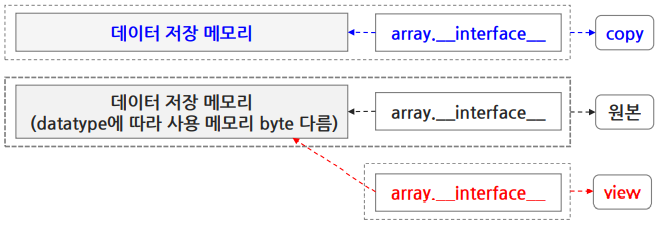

In [ ]:
def npinfo(n, a, x):
    print("name    :", n)    
    print("share   :", np.may_share_memory(a, x) )
    print("data    :", x.tolist())    
    print("ndim    :", x.ndim)
    print("shape   :", x.shape)
    print("dtype   :", x.dtype)
    print("-" * 30)

In [ ]:
# copy
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.copy()
b[0, 0] = False  # 0 also can use
npinfo("original", a, a)
npinfo("copy", a, b)

name    : original
share   : True
data    : [[True, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : copy
share   : False
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


In [ ]:
# view
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.view(np.bool)
b[0, 0] = 0
npinfo("original", a, a)
npinfo("view", a, b)  

name    : original
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : view
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


## 5.ndarray 변환 (reshape, flatten)

In [14]:
import sys
def npinfo(n, a, x):
    print("name   :", n)
    print("share  :", np.may_share_memory(a, x))
    print("data   :", x.tolist())  
    print("shape  :", x.shape)
    print("dtype  :", x.dtype)
    print("stride :", x.strides)
    print("addr   :", x.__array_interface__['data'][0])    
    print("sizeof :", sys.getsizeof(x))
    print("-" * 30)

In [15]:
a = np.array([[[1]]])
a.ndim

3

In [16]:
##  reshape은 반드시 익혀 주세요!

In [24]:
a = np.arange(24).reshape(12, -1)
b = a.reshape(-1)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [19]:
#np.reshape(a, newshape: int or tuple or ints, order='C')
#arr.reshape(newshape: int or tuple or ints, order='C')
import numpy as np
a = np.array([[1,2,3],[4,5,6]])   
b = a.reshape(1, -1)   # axis=0, axis=1  (축 번호)    # 1 * x = 6
c = a.reshape(-1)
d = a.reshape(-1, 1)
#print(a.size)    # a.shape => (2, 3)
npinfo("a.reshape(1, -1)", a, b)
npinfo("a.reshape(-1)", a, c)
npinfo("a.reshape(-1, 1)", a, d)
#b[0,0] = 100
#c[1] = 200
#print(a)

name   : a.reshape(1, -1)
share  : True
data   : [[1, 2, 3, 4, 5, 6]]
shape  : (1, 6)
dtype  : int64
stride : (48, 8)
addr   : 140656511144800
sizeof : 112
------------------------------
name   : a.reshape(-1)
share  : True
data   : [1, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int64
stride : (8,)
addr   : 140656511144800
sizeof : 96
------------------------------
name   : a.reshape(-1, 1)
share  : True
data   : [[1], [2], [3], [4], [5], [6]]
shape  : (6, 1)
dtype  : int64
stride : (8, 8)
addr   : 140656511144800
sizeof : 112
------------------------------


In [ ]:
# 1차원 변경
b = 
npinfo("a.reshape(-1)", a, b)
a.tolist(), b.tolist()

name   : a.reshape(-1)
share  : True
data   : [100, 200, 3, 4, 5, 6]
shape  : (6,)
dtype  : int64
stride : (8,)
addr   : 33135264
sizeof : 96
------------------------------


([[100, 200, 3], [4, 5, 6]], [100, 200, 3, 4, 5, 6])

In [ ]:
# 6행 1열의 배열
b = 
npinfo("a.reshape(-1, 1)", a, b)

name   : a.reshape(-1, 1)
share  : True
data   : [[1], [2], [3], [4], [5], [6]]
shape  : (6, 1)
dtype  : int64
stride : (8, 8)
addr   : 33135360
sizeof : 112
------------------------------


In [ ]:
a = np.array([[1,2,3], [4, 5, 6]], dtype=np.int16)
print(a, a.dtype)

[[1 2 3]
 [4 5 6]] int16


In [ ]:
b = a.flatten()
c = a.reshape(-1)
b[0] = 100
c[1] = 200
npinfo("a.flatten()", a, b)
npinfo("a.reshape(-1)", a, c)
a.tolist(), b.tolist()

name   : a.flatten()
share  : False
data   : [100, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int16
stride : (2,)
addr   : 49204128
sizeof : 108
------------------------------
name   : a.reshape(-1)
share  : True
data   : [1, 200, 3, 4, 5, 6]
shape  : (6,)
dtype  : int16
stride : (2,)
addr   : 53411296
sizeof : 96
------------------------------


([[1, 200, 3], [4, 5, 6]], [100, 2, 3, 4, 5, 6])

In [ ]:
# ndarray.astype을 사용하여 type을 변경할 수 있다
a = np.array([[1,2,3],[4,5,6]], dtype = np.int64) 

# astype을 사용하여 np.int32로 타입을 변경하라
b = 
npinfo("a.astype(np.int32)", a, b)

name   : a.astype(np.int32)
share  : False
data   : [[1, 2, 3], [4, 5, 6]]
shape  : (2, 3)
dtype  : int32
stride : (12, 4)
addr   : 39613216
sizeof : 136
------------------------------


## 6.ndarray의 연산
- element-wise : 같은 shape을 갖는 두 배열 간의 연산, numpy 연산의 기본
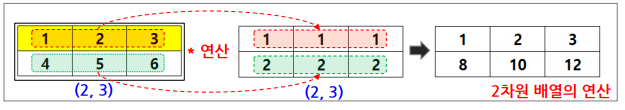

### 6-01. ndarray 산술연산

In [ ]:
import numpy as np

In [ ]:
a = np.array( range(1, 7) )
b = np.array( range(7, 13) )
display(a, b)

array([1, 2, 3, 4, 5, 6])

array([ 7,  8,  9, 10, 11, 12])

In [ ]:
#element-wise 방식으로 연산이 이루어짐
a = np.array( range(1, 7) )
b = np.array( range(7, 13) )
print('a =', a)
print('b =', b)
print('a +  b =', a + b)
print('b -  a =', b - a)
print('a *  b =', a * b)
print('b /  a =', b / a)
print('b // a =', b // a)
print('b %  a =', b % a)

print('a +  2 =', a + 2)   # broadcasting => element-wise 연산을 위해 확장하는 것
print('b -  1 =', b - 1)

a = [1 2 3 4 5 6]
b = [ 7  8  9 10 11 12]
a +  b = [ 8 10 12 14 16 18]
b -  a = [6 6 6 6 6 6]
a *  b = [ 7 16 27 40 55 72]
b /  a = [7.  4.  3.  2.5 2.2 2. ]
b // a = [7 4 3 2 2 2]
b %  a = [0 0 0 2 1 0]
a +  2 = [3 4 5 6 7 8]
b -  1 = [ 6  7  8  9 10 11]


In [ ]:
# tolist()를 사용하여 list로 변환
a = np.array(range(1, 7)).reshape(2,3)
b = np.array(range(7, 13)).reshape(2,3)
print(a)
print(type(a.tolist()))
print('a =', a.tolist())
print('b =', b.tolist())
print('a + b =', (a + b).tolist())
print('a * b =', (a * b).tolist())

[[1 2 3]
 [4 5 6]]
<class 'list'>
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9], [10, 11, 12]]
a + b = [[8, 10, 12], [14, 16, 18]]
a * b = [[7, 16, 27], [40, 55, 72]]


In [ ]:
# element-wise 성립하지 않음 (broadcasting안됨)
a = np.array( [1, 3, 5] )
c = np.array( [7, 9] )
print('a + c =', a + c)

### 6-02. ndarray broadcasting
- broadcasting 이란?
- element-wise가 성립하지 않는 경우 두 배열의 크기를 동일하게 만들어 연산가능하도록 하는 것  
- broadcasting의 배열 전환 원리
   - 한 배열 shape이 다른 배열 shape의 부분 shape이면 차원이 높은 배열 shape을 따름
   > (4, 2) + (2, ) => (4, 2)
   - 요소 개수가 1인 차원에 대해 다른 배열의 동일 차원의 요소 수를 따름
   > (5, 1) + (3, ) => (5, 3), (5, 1, 4) + (3, 1) => (5, 3, 4)
   - 스칼라 값은 상대 배열의 shape과 같은 shape, 동일 값으로 구성된 배열이 됨
   > (2, 3) + 2 => (2, 3)



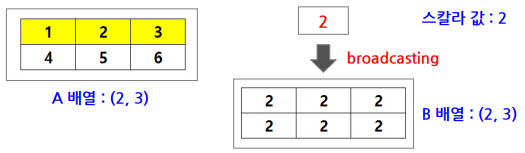

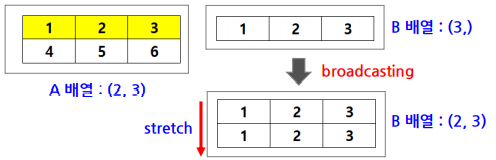

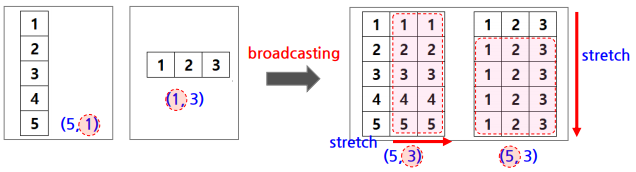

In [ ]:
def printary(m, *a):
    print(m)
    for x in a:
        print(x.shape)
        print(x.tolist())

In [ ]:
a=np.array([[1, 1, 1], [1, 1, 1]])
b=np.array([[1, 1, 1], [2, 2, 2]])
c=np.array([[1],[2],[3]])
d=np.array([3, 3, 3])
print(a.shape, b.shape, c.shape, d.shape)

(2, 3) (2, 3) (3, 1) (3,)


In [ ]:
printary("a+b", a, b, a+b)

In [ ]:
# 부분 shape
(2, 3, 4) => (4,), (3, 4)
(2, 1, 3, 4) => (4,), (3, 4), (1, 3, 4)

In [ ]:
# (2, 3)   (3,) => 결과 shape은 ?
printary("a+d", a, d, a+d)

In [ ]:
# (2, 3) + Scaler => 결과 shape은?
printary("b+4", b, b+4)

In [ ]:
# (3, 1) (3,)  => 결과 shape은?
printary("c+d", c, d, c+d)

c+d
(3, 1)
[[1], [2], [3]]
(3,)
[3, 3, 3]
(3, 3)
[[4, 4, 4], [5, 5, 5], [6, 6, 6]]


### 6-03. ndarray 비교연산
- ==, !=, >, <, >=, <= : 결과 True/False
- element-wise 방식 (필요시 broadcasting)

In [26]:
a = np.array([[1],[2],[3],[4],[5]])  # (5, 1)
b = np.array([1, 2, 3])              # (3,)
c = a + b
print(a.shape, b.shape, c.shape)
# (5, 1) (3,) => (5, 3) (3,) => (5, 3) (5, 3)
c

(5, 1) (3,) (5, 3)


array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8]])

In [ ]:
print(a)
print(b)
print(c)

In [ ]:
def printary(*a):
    for x in a:
        print(x.tolist(), end='\n')
        print("-" * 45)

In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
c = a==b
print(c.dtype)
printary(a==b, a!=b)

In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
printary(a>b, a<b)

In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])  # (2, 3)
b=np.array([[1, 3, 5], [2, 4, 6]])
c=np.array([4, 3, 3])   # (3,)  # [[4, 3, 3], [4, 3, 3]]
printary(a>=c, b<=3)    #  3    # [[3, 3, 3],[3, 3, 3]]

In [ ]:
# 왜 numpy를 배워야 하나?  
a = np.random.randint(50, 101, 10)
b = []
for x in a :
    if x>=70 :
        b.append(x)
display(b)     

b = [ x for x in a if x >=70 ]   # comprehension
display(b)

b = a[ a>=70 ]  # ndarray!
display(b)

[88, 93, 81, 75, 78]

[88, 93, 81, 75, 78]

array([88, 93, 81, 75, 78])

## 7.Indexing

### 7-01. ndarray indexing 이해
- indexing을 사용하여 배열에서 원하는 데이터를 참조/변경한다
- 배열 이름 뒤에 [ ] 를 사용하여 참조/변경 할 데이터를 표기한다
- 결과는 원본의 view이며, view에 대입을 통해 데이터 변경이 가능함
- ndim >= 2 인 경우 [ ] 내부에 콤마(,)를 사용하여 차원(축, axes, axis)을 구분함
- 콤마(,) 사이에는 참조/변경하기 원하는 데이터에 대한 표기(indexer)가 포함되어야 함
- axis=0을 제외한 차원에 대한 표기 생략가능, 생략은 “모두 선택”의 의미를 갖음
- https://numpy.org/doc/stable/reference/arrays.indexing.html
- https://numpy.org/devdocs/user/basics.indexing.html

In [ ]:
# single element indexer의 사용 - 데이터 참조
import numpy as np
a = np.arange(9).reshape(3,3)

print(a)       # 2D
print(a[1])    # 1D
print(a[0, 2]) # Scalar
print(a[0][2]) # indexing을 두 번 한 것이다  a[0][2] => 사용하지 않는 것이 좋다

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[3 4 5]
2
2


In [ ]:
a.dtype

dtype('int64')

In [ ]:
# single element indexer의 사용 - 데이터 변경
a[0, 2] = 100
print(a)
a[1][2] = 200
print(a)
a[2] = [10, '20', 3.67]
print(a)

[[  0   1 100]
 [  3   4   5]
 [  6   7   8]]
[[  0   1 100]
 [  3   4 200]
 [  6   7   8]]
[[  0   1 100]
 [  3   4 200]
 [ 10  20   3]]


### 7-02. Indexer의 종류
- single element index : integer object
- slicing & stride index : slice object => start:stop:step
- index arrays : sequence-like, numpy object
- boolean array : boolean array : the same shape with original array, dtype = bool
- structural indexing tools : ..., np.newaxes
- index + slice 

In [27]:
a = np.arange(5)

print(a[1], type(a[1]))     # single element
print(a[[1]], type(a[[1]])) # index array
print(a[1:4:2])             # slice and stride
print(a[[0,1,-1]])          # index array
print(a[[True, False, False, True, False]]) # boolean array
print(a)
print(a[:, np.newaxis])

1 <class 'numpy.int64'>
[1] <class 'numpy.ndarray'>
[1 3]
[0 1 4]
[0 3]
[0 1 2 3 4]
[[0]
 [1]
 [2]
 [3]
 [4]]


### 7-03. list와 ndarray의 indexing 차이점
- ndarray의 indexing의 반환 값은 원본을 참조하는 view이다 
- 새로운 ndarray로 처리하려면 copy 함수나 메서드를 사용해야 한다


In [ ]:
# list of python
x = [[1, 2, 3], [6, 7, 8]]
z = x[:]  #  [id(x[0])][id(x[1])]
z[0] = [10, 20, 30]
z[1][0] = 100
print(x, z, sep='\n')
print(id(x[1]), id(z[1]))
print("-"*25)

[[1, 2, 3], [100, 7, 8]]
[[10, 20, 30], [100, 7, 8]]
140012171248776 140012171248776
-------------------------


In [ ]:
# ndarray of numpy
x = np.array([[1, 2, 3], [6, 7, 8]])
z = x[1:]
display(z)

z[0] = [10, 20, 30]
print(x, z, sep='\n')
print(np.may_share_memory(x,z)) 
print(x.__array_interface__['data'][0], z.__array_interface__['data'][0], x.dtype)

array([[6, 7, 8]])

[[ 1  2  3]
 [10 20 30]]
[[10 20 30]]
True
32800400 32800424 int64


### 7-04. single element index 사용
- single element index의 사용이 1개 증가 할 때마다 배열의 차원(ndim)은 1씩 감소한다
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 index를 나열함
- index 표기되지 않은 차원은 “모두 선택”
- 예) 2차원 배열에서 a[n]은 n번 행 전체를 반환 함
- indexing을 연속으로 진행한 것과 콤마(,) 나열은 같은 결과
- 예) a[n][m] == a[n, m]

In [ ]:
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[0].tolist())
print(a[0, 0].tolist())
print(a[0, 0, 0])

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[0, 1], [2, 3], [4, 5]]
[0, 1]
0


### 7-05. slice & stride
- arr[n:m:k]
- n 부터 m-1 까지, k 씩 건너 뛴 위치 요소로 구성된 배열 반환
- n, m, k는 생략 가능하며 생략시 n = 0, m = len(arr), k=1
- slice & stride의 사용이 증가해도 배열의 차원(ndim)은 변화 없음
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 indexer를 나열함
- indexer가 표기되지 않은 axis는 “모두 선택”
-  :  특정 axis에 대해 모든 범위를 의미함
-  ... 나머지 모든 차원에 대해 모든 범위를 의미함


In [ ]:
a = np.arange(24).reshape(3, 4, 2)
display(a, a[ :2, 1:, :])    # (2, 3, 2)

In [ ]:
# 차원(ndim)의 변화는 없음
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[1:].tolist())   # a[1:], a[1:, :, :] => 1, 3, 2
print(a[..., ::-1].tolist())   # axis 0, 1은 그대로(모두), axis 2는 뒤집기
print(a[:, ::-1].tolist())     # axis 0 그대로(모두), axis 1 뒤집기, axis 2는 그대로(모두)

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[[6, 7], [8, 9], [10, 11]]]
[[[1, 0], [3, 2], [5, 4]], [[7, 6], [9, 8], [11, 10]]]
[[[4, 5], [2, 3], [0, 1]], [[10, 11], [8, 9], [6, 7]]]


In [ ]:
a[1:].shape

(1, 3, 2)

### 7-06. index arrays
- index_array은 dtype=int인 배열로, index 번호를 element로 갖는 배열임
- index_array 의  형태(shape)에 따라 반환되는 배열의 ndim이 원본과 동일하거나, 증가, 감소 될 수 있음

#### 7-06-1. 1차원
- index_array 에 포함된 index 항목들로 구성된 배열 반환
- a[ [0, 2, 4] ] 는 a에서 0,2,4 번 index 항목으로 구성된 배열 반환
- index_array 사용시 주의 사항
   - index 중복 사용 가능
   - 2차원 이상의 index_array 는 ndarray 를 사용( [[[ -> 사용 불가능)


In [ ]:
import numpy as np
a = np.arange(5) # [0 1 2 3 4]
print( a[0], a[[0]], type(a[[0]]))
b = a[np.array([[0]])]
print( b, b.ndim  )
print( a[[-1, 0, 1, 0]])
#print( a[[[0, 2, 4], [1, 3, 3]]])
print( a[np.array([[0, 2, 4], [1, 3, 3]])])

0 [0] <class 'numpy.ndarray'>
[[0]] 2
[4 0 1 0]
[[0 2 4]
 [1 3 3]]


#### 7-06-2.  2차원
- idx_a1, idx_a2의 같은 위치 항들이 묶여 위치 정보가 됨
- 다차원이 되면 콤마(,)로 나열하며 동일 길이로 구성되어야 함
- a가 2D array인 경우 
  - a[ [0,0,1],[2,3,1] ] 은 [0,2], [0,3], [1,1] 항을 배열로 반환
  - a[ [0, 1], 0] : a[ [0,0], [1,0] ] (broadcasting)  [0, 0], [1, 0] 항 반환

In [ ]:
a = np.arange(12).reshape(3, -1)
print(a)

# (0, 2) (0, 3) (1, 1) (-1,-1)

print(a[[0,0,1, -1], [2,3,1, -1]])
print(a[[0,1], 0])

#### 7-06-3.  Mission 먼저 수행해보고 비교하세요
 (수행 전)


In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10] 

In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]

#### 7-06-4.  Mission 먼저 수행해보고 비교하세요 (수행 후, Solution)



In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10]  
# [0,0,0],[0,1,1],[1,1,0],[1,2,0]
print(a[[0,0,1,1],[0,1,1,2],[0,1,0,0]])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  3  8 10]


In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]
# [0,1],[1,0],[2,2],[3,0]  - single element index
print(a[np.array([[0,1],[2,3]]), np.array([[1,0],[2,0]])])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1 3]
 [8 9]]


### 7-07. boolean array의 사용
- boolean_array는 원본배열과 동일한  shape의 dtype=bool인 배열
- 원본에서 boolean_array가 True인 위치의 것만을 대상으로하는 배열이 반환됨
- boolean_array는 ndarray, list 등으로 작성하거나, 연산의 결과 일 수 있음
- 주로 결과가 True/False인 비교연산식을 사용하여 작성함
- 복잡한 조건은 np.logical_and(), np.logical_or(), np.logical_not() 활용
- boolean array와 &, |,~ 연산자를 사용하여 조건작성 가능 (괄호 사용 중요)


In [29]:
a = np.arange(6, 0, -1) # [6 5 4 3 2 1]
b = np.array([True, False, True, True, False, True])
print(a[b]) # boolean array
print(a%2)
print(a%2==0)
print(a[a%2==0]) # boolean array  (dtype = bool)
print(a[a%2])    # index array (dtype = int)

[6 4 3 1]
[0 1 0 1 0 1]
[ True False  True False  True False]
[6 4 2]
[6 5 6 5 6 5]


In [31]:
def printary(w1, w2, ary, *, sep='|'):
    for x in ary.split(sep):
        x = x.strip()
        t = eval(x)
        print(f'%-{w1}s %-{w2}s %s' % (x, t.shape, t.tolist()))
    print("-" * 30)

In [ ]:
a = np.random.permutation(10)

# 2의 배수인 것 검색  __________ 를 채우세요!
printary(10, 7, "a | _____________")

# 4보다 크거나 같은 수 검색  __________ 를 채우세요!
printary(10, 7, "___________")   


a          (10,)   [2, 1, 5, 3, 0, 8, 9, 6, 7, 4]
a[a%2==0]  (5,)    [2, 0, 8, 6, 4]
------------------------------
a[a>=4]    (6,)    [5, 8, 9, 6, 7, 4]
------------------------------


In [32]:
a = np.random.permutation(10)
# | <= or를 나타낸다 => 반드시 각 조건(condition expression)을 괄호로 묶어야 한다
# 3의 배수이거나 2의 배수인 수 검색, 결과를 보고 직접입력해 보세요
printary(32, 7, "a[np.logical_or(a%3==0, a%2==0)]")
printary(32, 7, "a[(a%3==0) | (a%2==0)]", sep='+')

a[np.logical_or(a%3==0, a%2==0)] (7,)    [0, 2, 8, 6, 4, 9, 3]
------------------------------
a[(a%3==0) | (a%2==0)]           (7,)    [0, 2, 8, 6, 4, 9, 3]
------------------------------


In [ ]:
# & <= and를 나타낸다 => 반드시 각 조건(condition expression)을 괄호로 묶어야 한다

# 6보다 크거나 같고, 9보다 작거나 같은 수 검색, 결과를 보고 직접입력해 보세요
printary(32, 7, "a[  ]")
printary(32, 7, "a[  ]")

a[np.logical_and(a>=6,a<=9)]     (4,)    [6, 9, 8, 7]
------------------------------
a[(a>=6) & (a<=9)]               (4,)    [6, 9, 8, 7]
------------------------------


In [ ]:
# ~  <= not을 나타낸다

# 3의 배수가 아닌 수 검색, 결과를 보고 직접입력해 보세요
printary(32, 7, "a[   ]")
printary(32, 7, "a[   ]") 

a[np.logical_not(a%3==0)]        (6,)    [2, 1, 5, 4, 8, 7]
------------------------------
a[~(a%3==0)]                     (6,)    [2, 1, 5, 4, 8, 7]
------------------------------


In [ ]:
print(a)
# a배열에서 3의 배수인 수를 -1로 변경하기

print(a)

[2 3 6 9 1 5 0 4 8 7]
[ 2 -1 -1 -1  1  5 -1  4  8  7]


### 7-08. combine index & slice

In [ ]:
b = np.arange(1, 12, 2).reshape(3, -1)
print(b)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [ ]:
# 마지막 열에 대해 차원을 유지하며 반환  shape =(3, 1)


(array([[ 3],
        [ 7],
        [11]]), [[3], [7], [11]])

In [ ]:
# 각 행의 마지막 열로 1차원 배열 만들어 반환 shape  = (3, )


(array([ 3,  7, 11]), [3, 7, 11])

In [ ]:
c = np.arange(12).reshape(2,3,2)
print(c)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [ ]:
# axis=0 (모두), axis=1 (-1, 마지막 index), axis=2 (모두) shape = (2,2)
 

array([[ 4,  5],
       [10, 11]])

In [ ]:
# c[:, :, -1]와 동일한 표현 ... 사용해 볼 것 , axis=0, 1 (모두), axis=2(-1, 마지막 index)  shape = (2, 3)


array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
# c[:, :, :1]와 동일  axis=0, 1 (모두), axis=2(0~0) shape = (2, 3, 1)


In [ ]:
# c[[0], 1, :]  axis=0 (index array [0]), axis=1 (single element), axis=2 (모두) 
 
# shape = (1, 2)

array([[2, 3]])

In [ ]:
# c[[0], 1:, :] axis=0 (index array [0]), axis=1 (slice), axis=2 (모두) 

# shape = (1,2,2)

array([[[2, 3],
        [4, 5]]])

### 7-09. indexing 활용

In [ ]:
import numpy as np

In [ ]:
aN3 = np.array([[0,-1,4],[-2,3,2],[1,-2,-1],[-4,3,-2]])
print(aN3)

[[ 0 -1  4]
 [-2  3  2]
 [ 1 -2 -1]
 [-4  3 -2]]


In [ ]:
# aN3배열의 0번, 1번 열을 교환하여 배열 생성
  # index array

array([[-1,  0,  4],
       [ 3, -2,  2],
       [-2,  1, -1],
       [ 3, -4, -2]])

In [ ]:
# aN3 배열의 모든 행 0번 열을 가지고 1D 배열 만들기 - single element 사용, 결과 shape = (4,)
    

array([ 0, -2,  1, -4])

In [ ]:
aN3

array([[ 0, -1,  4],
       [-2,  3,  2],
       [ 1, -2, -1],
       [-4,  3, -2]])

In [ ]:
# aN3배열의 0번 열의 값이 0보다 작은 것에 대해 True 아닌 것에 대해 False로 출력


array([False,  True, False,  True])

In [ ]:
# aN3 배열의 0번 열 값이 0보다 작은 것에 대한 행 추출


array([[-2,  3,  2],
       [-4,  3, -2]])

In [ ]:
# aN3 배열의 0번 열 값이 0보다 작은 것에 대한 aN3배열의 행에 대해 1번부터 끝까지의 열 추출


array([[ 3,  2],
       [ 3, -2]])

In [ ]:
a3N = np.array([[x] * 5 for x in range(3)])
print(a3N)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]


In [ ]:
# a3N 배열의 1, 2번 행을 교환함
   # index array

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1]])

In [ ]:
aN  = np.arange(3)
print(aN)

[0 1 2]


In [ ]:
# aN 배열의 shape을 (3, 1)로 변경함
aN.reshape(-1, 1)

array([[0],
       [1],
       [2]])

In [ ]:
# aN 배열의 shape을 (3, 1)로 변경하는 다른 방법 (None 사용)


array([[0],
       [1],
       [2]])

In [ ]:
# aN 배열의 shape을 (3, 1)로 변경하는 다른 방법 (np.newaxis 사용)


array([[0],
       [1],
       [2]])

## 8.numpy의 유용한 함수


### 8-01. 정수값과 관련 있는 난수 발생
- np.random.seed(정수)
- 정수가 같으면 항상 같은 난수가 발생됨
- np.random.randint(start, stop, size=shape)
- start ~ stop-1까지의 정수로 구성된 size 모양의 난수 배열 반환 
- 1차원인 경우 size에 정수 사용가능


In [ ]:
import numpy as np
#np.random.seed(101)
x = np.random.randint(1, 5, size=(3,4))
print(x)

[[3 1 4 2]
 [3 2 2 4]
 [4 3 4 1]]


### 8-02. ndarray 객체 순서 무작위 변경
- np.random.shuffle(ndarray객체)
- None 반환

In [ ]:
a = np.arange(10)
a = np.array([[1,2,3],[4,5,6],[3,4,5],[7,1,5]])
np.random.shuffle(a)
print(a)

a = np.random.permutation(10)
print(a)

[[4 5 6]
 [7 1 5]
 [3 4 5]
 [1 2 3]]
[2 0 9 4 1 5 8 6 7 3]


### 8-03. 중복 값 제거된 배열 생성
- np.unique(a, return_counts=False)
- a 가 다차원 배열인 경우 1차원으로 변경되어 작업 됨
- return_counts 인수를 True로 설정하면 각 데이터 개수의 ndarray 배열도 생성하여 반환
- (중복 값 제거된 배열, 각 데이터 개수의 배열) tuple 반환


In [ ]:
np.random.seed(1000)
a = np.random.randint(1, 100000, size = 200000)
b = a.reshape(1000, -1)

In [ ]:
# a 배열에 대해 중복을 제거한 값 구하기
x1 = np.unique(a)

# b 배열에 대해 중복을 제거한 값 구하기
x2 = np.unique(b)
print(f'size={len(x1)}', x1, sep='\n')
print(f'size={len(x2)}', x2, sep='\n')

size=86439
[    1     2     3 ... 99996 99998 99999]
size=86439
[    1     2     3 ... 99996 99998 99999]


In [ ]:
c = [ [1,2,3], [1,2,3], [1,3,5] ]
d = [ [1,2,3], [1,2,3], [1,3] ]

# x3, x4 결과를 확인하고 그 이유를 분석하세요.
x3 = np.unique(c)
x4 = np.unique(d)
print(x3, x4, sep='\n')

[1 2 3 5]
[list([1, 2, 3]) list([1, 3])]


In [ ]:
# c 배열에 대해 중복을 제거하고, 각 데이터의 개수를 반환 받아 출력해 보세요. 
x5, rcount = np.unique(c, return_counts=True)
print(x5, rcount, sep='\n')

[1 2 3 5]
[3 2 3 1]


### 8-04. 배열에서 가장 큰/작은 요소의 index 번호 
- np.argmax(a)
- np.argmin(a)
- index는 0번부터 시작
- 2차원 이상인 경우 1차원으로 변경하여 작업 진행됨

In [ ]:
np.random.seed(1234)
x1 = np.random.randint(100, size = 12)
x2 = x1.reshape(2,3,2)
print(x1, x2, sep='\n')

[47 83 38 53 76 24 15 49 23 26 30 43]
[[[47 83]
  [38 53]
  [76 24]]

 [[15 49]
  [23 26]
  [30 43]]]


In [ ]:
print(f'x1 - argmax : {np.argmax(x1)}, argmin : {np.argmin(x1)}')
print(f'x2 - argmax : {np.argmax(x2)}, argmin : {np.argmin(x2)}')

x1 - argmax : 1, argmin : 6
x2 - argmax : 1, argmin : 6


### 8-05. min보다 작은 값을 min으로 max보다 큰 값을 max로 변경
- np.clip(a, min, max, out=None)
- 새로운 배열 반환, out에 a와 동일 크기의 배열 지정 가능
- out 사용 시, out에 지정된 배열로도 결과가 반환됨 (배열내용변경)


In [ ]:
np.random.seed(150)
x = np.random.randint(30, 60, 10)
y1 = np.clip(x, 35, 55)
print(x, y1, sep='\n')

[34 56 57 55 46 48 34 58 44 35]
[35 55 55 55 46 48 35 55 44 35]


In [ ]:
y2 = np.clip(x, 40, 50, out=x)
print(x, y2,sep='\n')

[40 50 50 50 46 48 40 50 44 40]
[40 50 50 50 46 48 40 50 44 40]


### 8-06. 조건에 따른 데이터 선택
- np.where( 조건 [, c, d])
- 조건 : 참, 거짓(=0, False, None)으로 이루어진 
- 조건 배열이 참일 때 c, 거짓일 때 d를 취한 배열 반환 (c, d는 스칼라 가능)
- c, d 생략 시 조건이 참인 것에 대한 index 배열(ndarray) tuple 반환 (ndarray, ndarray, ...) 의 형태
- 조건 배열의 ndim == len(tuple)
- 복잡한 조건은  ~, &, |, 및 np.logical_and(), np.logical_or(), logical_not() 사용



In [ ]:
a = np.array([4, 8, 2, 5])  
b = np.array([3, 9, 1, 7])

# 각 결과를 예측하고 실행하여 확인해 보세요
print(np.where(True, a, b))
print(np.where(False, a, b)) 

In [ ]:
# 출력이 다음과 같도록 boolean list를 만들어 보세요.
# [[3 2]
#  [9 7]]
print(np.where(                  # boolean list here!  ,
                [[3, 4], [5, 7]],
                [[1, 2], [9, 2]])) 

[[3 2]
 [9 7]]


In [ ]:
a = np.array([[1, 3, 5], [7, 9, 11]])
# (0, 0) (1, 1) (0, 2)
# list arrays를 사용하여 다음 출력이 되도록 작성해 보세요
a[ , ]

array([1, 9, 5])

In [ ]:
a = np.array([['A', 'B'], ['C', 'D']])

# np.where에 한 개의 argument만 전달하면 True인 것에 대한 위치 list arrays가 반환 된다. 차원의 수와 동일한 개수의 ndarray가 반환 됨
ia0, ia1 = np.where([[True, False], [True, False]])

# ia0, ia1을 사용하여 ['A', 'C']가 출력되도록 하여 보세요.
c = a[     ]
print(c)


['A' 'C']


In [ ]:
x = np.where([[True, True], [False, True]])
# x를 사용하여 ['A', 'B', 'D']가 출력되도록 하여 보세요.
print(a[      ])

['A' 'B' 'D']


### 8-07. 통계값 함수들
- axis를 0 또는 1로 지정할 경우 
- axis=0은 index 방향으로 연산, axis=1은 column 방향으로 연산한 값을 배열로 반환함
- ndarray에서 동일 동작을 하는 동일 이름의 메서드 있음 (arr.mean())


In [34]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [35]:
# np.sum(a, axis=None)
# 배열내 모든 원소의 합을 스칼라 값으로 반환
a = np.arange(1,7).reshape((2,3))  

# a배열의 모든 요소의 합을 구함
b = a.sum()

# a배열의 axis = 0 방향의 요소의 합을 구함
c = a.sum(axis=0)

# a배열의 axis = 1 방향의 요소의 합을 구함
d = a.sum(axis=1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
21
[5 7 9]
[ 6 15]
------------------------------


In [ ]:
# np.mean(a, axis=None)
# 배열내 모든 원소의 평균을 스칼라 값으로 반환
# 중앙값 : median
a = np.arange(1,7).reshape((2,3))       
b = a.mean()
c = a.mean(axis = 0)
d = a.mean(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
3.5
[2.5 3.5 4.5]
[2. 5.]
------------------------------


In [ ]:
# np.std(a, axis=None)
# 배열내 모든 원소의 표준편차를 스칼라 값으로 반환
# 분산 : std
a = np.arange(1,7).reshape((2,3))       
b = a.std()
c = a.std(axis = 0)
d = a.std(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]
------------------------------


In [ ]:
# np.any(a, axis=None)
# 배열의 원소들 중 참이 하나라도 있으면 True 반환
# np.all(a, axis=None)
# 배열의 모든 원소가 참인 경우 True 반환

a = np.arange(6).reshape((2,3))  
a = np.arange(1, 6)
printary(a.any(), a.all())

True
True
------------------------------


### 8-08. dot, matmul
**dot, matmul 연산은 두 배열의 행과 열에 대한 곱의 합을 구하는 함수이다**
- a는 앞, b는 뒤에 위치한 배열일때
- a의 axis -1과 b의 axis -2의 각 요소 곱의 합을 구하는 것
- a의 axis -1과 b의 axis -2의 요소 수가 같아야 함
- b가 1-D인 경우 b의 axis -1의 요소가 곱의 대상이 됨

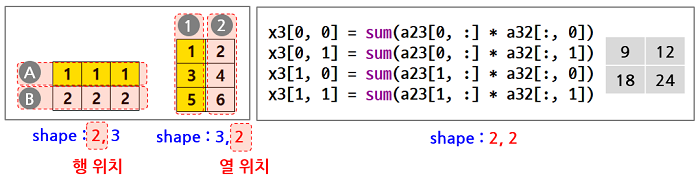

In [ ]:
import numpy as np

a = np.array([[1, 1, 1],
              [2, 2, 2]])
b = np.array([[1,2],
              [3,4],
              [5,6]])
print(a.shape, b.shape)

(2, 3) (3, 2)


In [ ]:
c = np.matmul(a,b)
d = a.dot(b)
print(c, d, sep='\n')

[[ 9 12]
 [18 24]]
[[ 9 12]
 [18 24]]


#### 8-08-1. matmul, dot의 같은 동작
- a, b 모두 1-D, a, b 모두 2-D, a는 1-D, b는 N-D, a는 N-D, b는 1-D 
- 이경우 matmul함수 또는 @연산자로 사용하는 것이 권장됨 

**- np.matmul(a, b), a @ b**
- https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
  - a와 b의 'Matrix product'을 구해 반환, a, b : **스칼라 사용할 수 없음**
  - a가 ndarray인 경우 @ 연산자를 사용할 수 있음
  
**- np.dot(a, b), a.dot(b)**
- https://numpy.org/doc/stable/reference/generated/numpy.dot.html
  - a와 b의 'Dot(Inner) product'을 구해 반환, a, b : **스칼라 사용할 수 있음**
  - 많은 경우 matmul과 동일한 동작

In [ ]:
# matmul, dot 연산은 shape을 계산할 수 있도록 연습하세요 ^^!!  

In [ ]:
# a, b 모두 1-D
# c = sum(a * b), c = scalar

a = np.array([1, 2, 3])
b = np.array([1, 2, 3])

c = np.matmul(a, b)
d = np.dot(a, b)
print(c, d, sep='\n')
print(c.shape)

14
14
()


In [ ]:
# a, b 모두 2-D
# c = sum(a[i, :] * b[:, n]), c.shape = (i, n) 

a = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])
b = np.array([[1, 2], 
              [3, 4]])
# (3, 2)  (2, 2) => (3, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')     

(3, 2) (2, 2) (3, 2)
[[ 7 10]
 [15 22]
 [23 34]]
[[ 7 10]
 [15 22]
 [23 34]]


In [ ]:
# a 1-D, b N-D 
# c = sum(a[:] * b[n, : , m]), c.shape = (n, m)
a = np.array([1,2,3])
b = np.array([[[1,2],
               [2,3],
               [3,4]]])
# (3, )  (1, 3, 2) => (1, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n') 

(3,) (1, 3, 2) (1, 2)
[[14 20]]
[[14 20]]


In [ ]:
# a 1-D, b N-D 
# c = sum(a[:] * b[n, : , m]), c.shape = (n, m)
a = np.array([1,2,3])
b = np.array([[1,2],
              [2,3],
              [3,4]])
# (3, )  (3, 2) => (2,)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n') 

(3,) (3, 2) (2,)
[14 20]
[14 20]


In [ ]:
# a N-D, b 1-D 
# c = sum(a[i, j, :] * b[:]), c.shape = (i, j)
a = np.array([[[1,2,3],
               [4,5,6]],
              [[1,1,1],
               [2,2,2]]])
b = np.array([1,2,3])
# (2, 2, 3)  (3,) => (2, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n') 

(2, 2, 3) (3,) (2, 2)
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]


#### 8-08-2. shape 계산 예제
- (2, 2, 3) (3, )
- (2, 3) (3, 2)
- (2, 3) (3, )
- (3, ) (3, 1)
- dot 만 가능 : (3, 2)  2 (Scalar) => (3, 2)

In [ ]:
a223 = np.array([[[1,2,3],[4,5,6]],[[1,1,1],[2,2,2]]])
a32 = np.array([[1,2],[3,4],[5,6]])
a31 = np.array([[1],[2],[3]])
a23 = np.array([[1,1,1],[2,2,2]])
a03 = np.array([1,2,3])

In [ ]:
x1=np.dot(a223, a03)
x2=np.matmul(a223, a03)
printary(a223, a03, x1, x2)

In [ ]:
x1=np.dot(a23, a32)
x2=np.matmul(a23, a32)
printary(a23, a32, x1, x2)

In [ ]:
x1=np.dot(a23, a03)
x2=np.matmul(a23, a03)
printary(a23, a03, x1, x2)

In [ ]:
x1=np.dot(a03, a31)
x2=np.matmul(a03, a31)
printary(a03, a31, x1, x2)

#### 8-08-3. matmul, dot의 다른 동작  
  - a, b 모두 1-D, a, b 모두 2-D, a는 1-D, b는 N-D, a는 N-D, b는 1-D는 동일 동작
  - 위의 경우가 아니라면 결과 배열의 shape이 다를 수 있음
      - 새로운 배열에서 계산한 값이 들어가는 위치가 다름
  - a, b 중 한 쪽이 스칼라
      - dot는 가능 matmul은 불가능

#### 8-08-4. 3차원이상을 포함한 배열의 matmul 연산
- 대응하는 열/행을 제외한 나머지 배열에서의 원래 index 위치를 유지한다
   - (**2**, ***2***, 3)  (**2**, 3, ***3***) => (**2**, ***2***, ***3***)
   - (**2**, ***2***, 3)  (**3**, 3, ***3***) => 불능  
   - (**2**, 3 )  (**3**, 3, **2**) => **(3, 2, 2)**
- 뒤 배열은 앞 배열과 '행'전까지의 요소 개수가 같아야 한다 (앞 배열의 차원이 더 높거나 같은 경우)
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다



#### 8-08-5. 3차원 이상을 포함한 배열의 dot 연산
- 대응하는 열/행을 삭제하고 앞 배열에서 뒤 배열 쪽으로 남은 index를 나열한다
   - (**2**, ***2***, 3)  (**2**, 3, ***3***) => (**2**, **2**, ***2***, ***3***)
   - (**2**, ***2***, 3)  (**3**, 3, ***3***) => (2, 2, 3, 3)   
   - (**2**, 3) (**3**, 3, **2**) => **(2, 3, 2)**
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다


In [ ]:
a23 = np.array([[1,1,1],
                [2,2,2]])   

a332 = np.array([[[1,2],
                  [3,4],
                  [5,6]],
                 [[1,1],
                  [1,2],
                  [2,2]],
                 [[1,2],
                  [1,3],
                  [1,4]]])   
r = a23[1, :]     # [2,2,2]
c = a332[0, :, 0] # [1,3,5] => 18
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a23, a332) 
x2 = np.dot(a23, a332)
# (2, 3)  (3, 3, 2)
# matmul : (3, 2, 2)  [0, 1, 0] => 18
# dot    : (2, 3, 2)  [1, 0, 0] => 18
print(x1, x2, sep='\n\n\n')


[2 2 2]
[1 3 5]
18
------------------------------
[[[ 9 12]
  [18 24]]

 [[ 4  5]
  [ 8 10]]

 [[ 3  9]
  [ 6 18]]]


[[[ 9 12]
  [ 4  5]
  [ 3  9]]

 [[18 24]
  [ 8 10]
  [ 6 18]]]


In [ ]:
a223 = np.array([[[1,1,1],
                  [2,3,4]],
                 [[3,2,1],
                  [1,2,3]]])  

a233 = np.array([[[1,2,1],
                  [3,4,2],
                  [5,7,6]],
                 [[1,1,1],
                  [1,2,2],
                  [2,2,2]]])  

r = a223[0, 1, :]  #[2,3,4]
c = a233[0, :, 0]  #[1,3,5] => 2 + 9 + 20 = 31
# matmul [0, 1, 0]
# dot [0, 1, 0, 0]
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a223, a233)  
x2 = np.dot(a223, a233) 
# (2, 2, 3)  (2, 3, 3)
# matmul : (2, 2, 3)
# dot : (2, 2, 2, 3)
print(x1, x2, sep='\n\n\n')


[2 3 4]
[1 3 5]
31
------------------------------
[[[ 9 13  9]
  [31 44 32]]

 [[ 7  9  9]
  [ 9 11 11]]]


[[[[ 9 13  9]
   [ 4  5  5]]

  [[31 44 32]
   [13 16 16]]]


 [[[14 21 13]
   [ 7  9  9]]

  [[22 31 23]
   [ 9 11 11]]]]


다음 두 배열의 dot 연산에 대한 결과 shape는?
- (**2, 2**, 3) (**2**, 3, **3**) => (2, 2, 2, 3)
- (**2, 2**, 3) (**3**, 3, **2**) => (2, 2, 3, 2)
- (2, 2, 3) (3, 3) => (2, 2, 3)
- (2, 2, 3) (3, 1)
- (2, 3) (3, 3, 2)


다음 두 배열의 matmul 연산에 대한 결과 shape는?
- (**2, 2**, 3) (2, 3, **3**) => (2, 2, 3)
- (**2**, 2, 3) (**3**, 3, 2) => 불능(axis=0의 크기가 다름)
- (2, 2, 3) (3, 3) => (2, 2, 3)
- (2, 2, 3) (3, 1)
- (2, 3) (3, 3, 2)


In [ ]:
import numpy as np

a223 = np.array([[[1,2,3],[4,5,6]],[[1,1,1],[2,2,2]]])
a332 = np.array([[[1,2],[4,5],[7,8]],[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]])
a233 = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[1,1,1],[2,2,2],[3,3,3]]])
a23 = np.array([[1,2,3],[4,5,6]])
a33 = np.array([[1,2,3],[3,4,6],[5,6,7]])
a31 = np.array([[1],[2],[3]])

def printary(*a):
    for x in a:
        print(x.shape, x.tolist(), sep='\n')
    print("-" * 30)
    

In [ ]:
# col * row 을 하므로 col와 row의 개수가 맞아야 함
x1=np.dot(a223, a233)
x2=np.matmul(a223, a233)
printary(a223, a233, x1, x2)

In [ ]:
x1=np.dot(a223, a332)
#x2=np.matmul(a223, a332)   # axis=0 should have the same size
printary(a223, a332, x1)

In [ ]:
x1=np.dot(a223, a31)
x2=np.matmul(a223, a31)
printary(a223, a31, x1, x2)

In [ ]:
x1=np.dot(a223, a33)
x2=np.matmul(a223, a33)
printary(a223, a33, x1, x2)

In [ ]:
x1=np.dot(a23, a332)
x2=np.matmul(a23, a332)
printary(a23, a332, x1, x2)

## 9.ndarray 파일입출력

In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [ ]:
import numpy as np
a1 = np.arange(20000)
a2 = np.random.randint(1, 10000, size=(5, 1000))
a3 = np.ones((1, 2, 1000), dtype=np.int32)
path="/content/"

np.save(path+"a1.npy", a1)
r = np.load(path+"a1.npy")
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


In [ ]:
#203.84KB
np.savez(path+"an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[1521 7562 3347 ... 2943 3498 5640]
 [2899 3182 2957 ... 7456 1089  260]
 [7834 3230 2693 ... 8641  246 3461]
 [ 901 7907 6577 ... 7812 6879 3873]
 [2086 7504 1330 ... 3849 6132 7368]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
#42.59KB
np.savez_compressed(path+"c_an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"c_an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[1521 7562 3347 ... 2943 3498 5640]
 [2899 3182 2957 ... 7456 1089  260]
 [7834 3230 2693 ... 8641  246 3461]
 [ 901 7907 6577 ... 7812 6879 3873]
 [2086 7504 1330 ... 3849 6132 7368]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
np.savetxt(path+"a1.txt", a1, fmt='%d')
r = np.loadtxt(path+"a1.txt", dtype=np.int32)
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


## 10.numpy의 nan, inf처리


In [ ]:
# np.nan, np.inf는 float type 이다
print(np.nan, type(np.nan))
print(np.inf, type(np.inf))

In [ ]:
# np.nan 에 대한 비교는 isnan, np.inf의 비교는 isinf 함수를 사용한다
a = np.array([np.nan, 1, 0, -1, np.inf], dtype=np.float16)
print(np.isnan(np.nan), np.isnan(a))
print(np.isinf(np.inf), np.isinf(a))

x = np.nan
# np.nan은 == 로 비교할 수 없고, is 로 비교할 수 있다  - 하지만 np.isnan()을 사용하자
print(np.nan == x)
print(np.nan is x)

True [ True False False False False]
True [False False False False  True]
False
True


In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print('-'*30)

In [ ]:
a = np.array([1, np.nan, np.nan, np.inf, 2, np.inf], dtype=np.float16)
b = np.array([1, np.inf, 1, 1, np.inf, np.nan], dtype=np.float16)
# np.inf가 포함된 연산의 경우 결과가 inf 가 된다.
# np.nan이 포함된 연산의 경우 결과가 nan 이 된다,  nan, inf가 동시에 연산되면 nan!
printary(a, b, a+b, a+2)

printary(a, a.sum(), a.cumsum(), a.all())
# unique()에서 inf 는 대상이 되지만 nan은 대상이 되지 않음
printary(np.sqrt(a), np.unique(a), np.unique(b))

[ 1. nan nan inf  2. inf]
[ 1. inf  1.  1. inf nan]
[ 2. nan nan inf inf nan]
[ 3. nan nan inf  4. inf]
------------------------------
[ 1. nan nan inf  2. inf]
nan
[ 1. nan nan nan nan nan]
True
------------------------------
[1.      nan   nan   inf 1.414   inf]
[ 1.  2. inf nan nan]
[ 1. inf nan]
------------------------------
